## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [3]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'SpendingScore'}, inplace = True)



**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [4]:
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print("Розмірність датасету:", customer_set.shape)

Розмірність датасету: (200, 5)


In [6]:
print(customer_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
print(customer_set.isnull().values.any())

False


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [8]:
customer_set = customer_set.drop('CustomerID', axis = 1)
customer_set.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

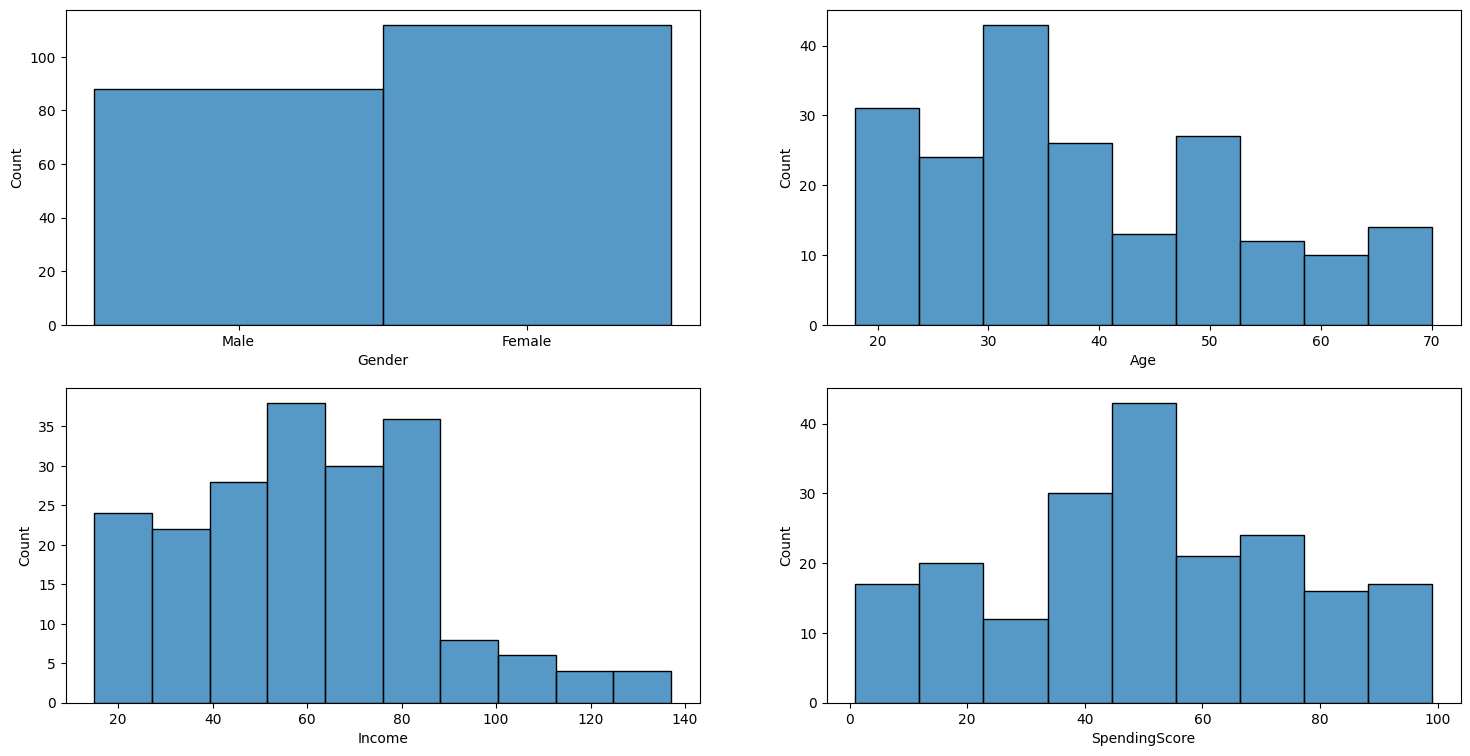

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(18, 9))

for variable, subplot in zip(customer_set, ax.flatten()):
    
  sns.histplot(x = variable, data = customer_set, ax = subplot)
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

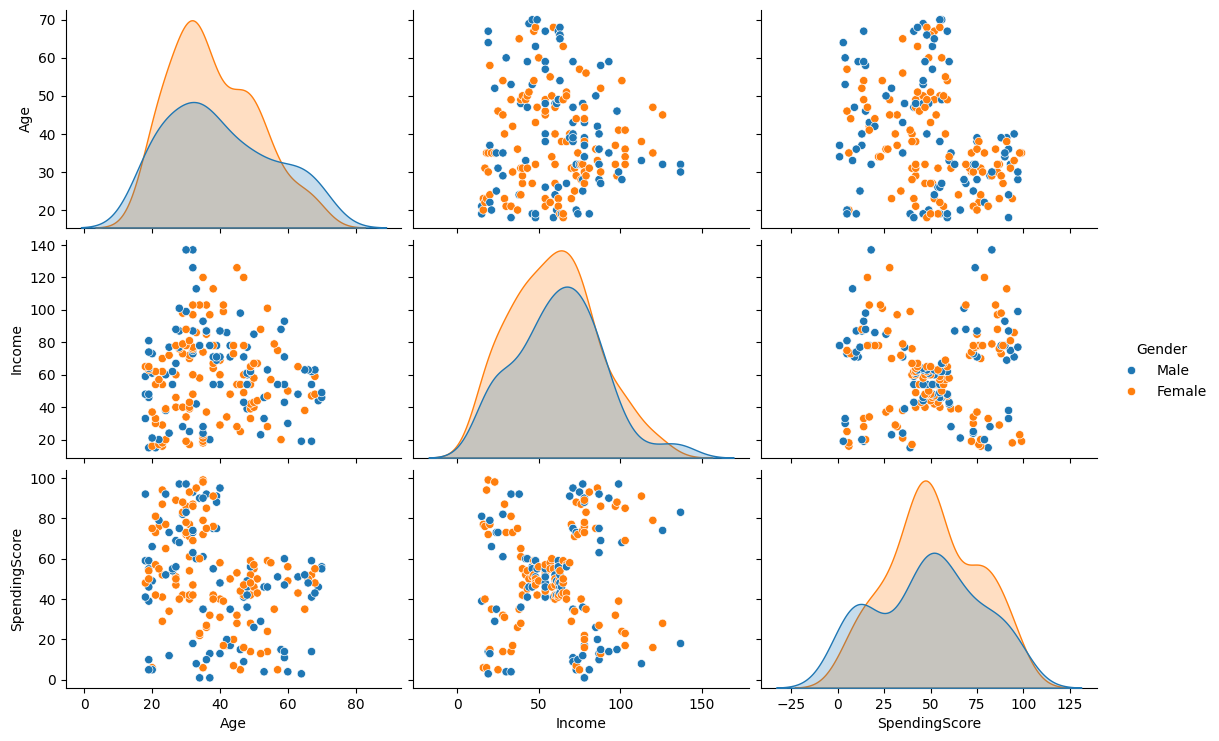

In [10]:
sns.pairplot(customer_set, hue="Gender", aspect=1.5)

plt.show()

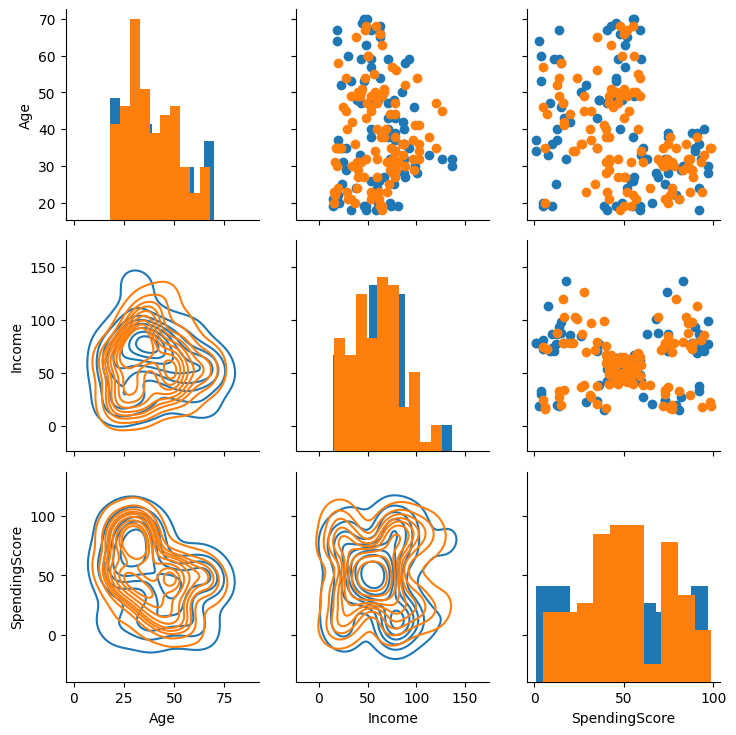

In [11]:
spg = sns.PairGrid(data = customer_set, hue = "Gender")

spg.map_diag(plt.hist)
spg.map_upper(plt.scatter)
spg.map_lower(sns.kdeplot)

plt.show()

**Висновки з 1-4 завдання (детальні)**

	1.	Датасет містить 200 рядків і 5 стовпців.
	2.	Змінну CustomerID видалено, оскільки вона є унікальним ідентифікатором і не впливає на результати аналізу.
	3.	У вибірці жінок більше, ніж чоловіків.
	4.	Найбільша кількість клієнтів припадає на вікову категорію 30–35 років, найменша — на 58–65 років.
	5.	Більшість клієнтів мають річний дохід у межах 50–62 тисяч.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

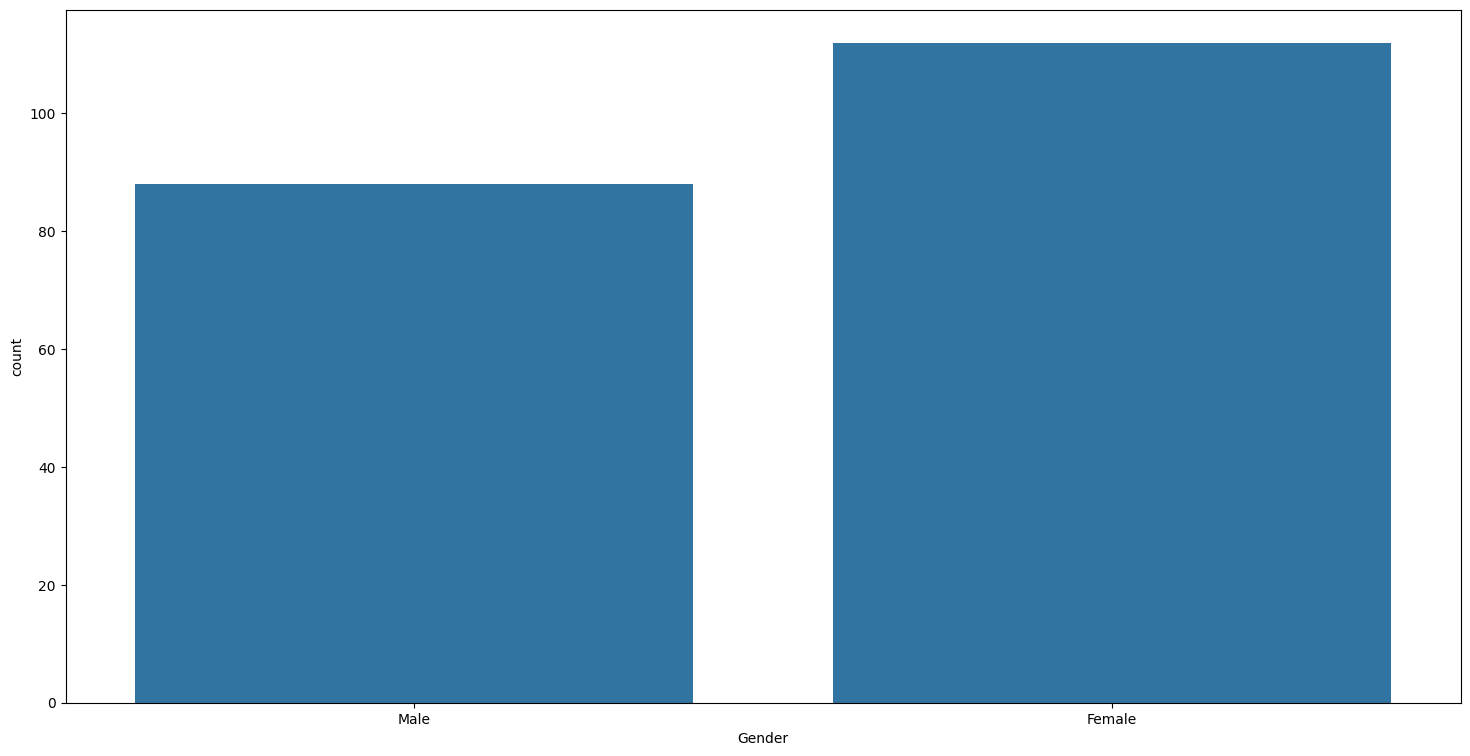

In [12]:
plt.figure(figsize = (18, 9))
sns.countplot(x = 'Gender', data = customer_set)
plt.show()

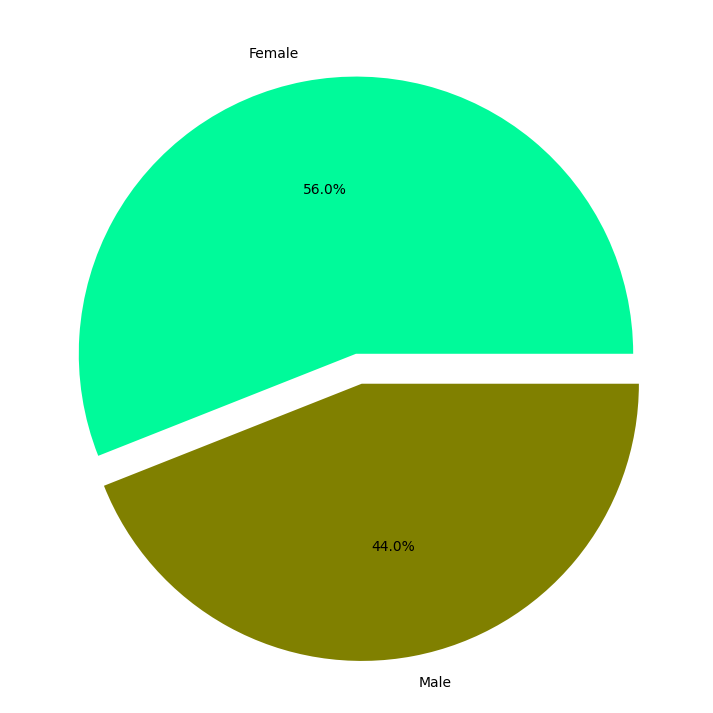

In [13]:
plt.figure(figsize = (18, 9))
plt.pie(customer_set.groupby('Gender').size(), labels = ['Female', 'Male'] , autopct = '%1.1f%%', explode = [0.01, 0.1], colors = ['MediumSpringGreen', 'Olive'])
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

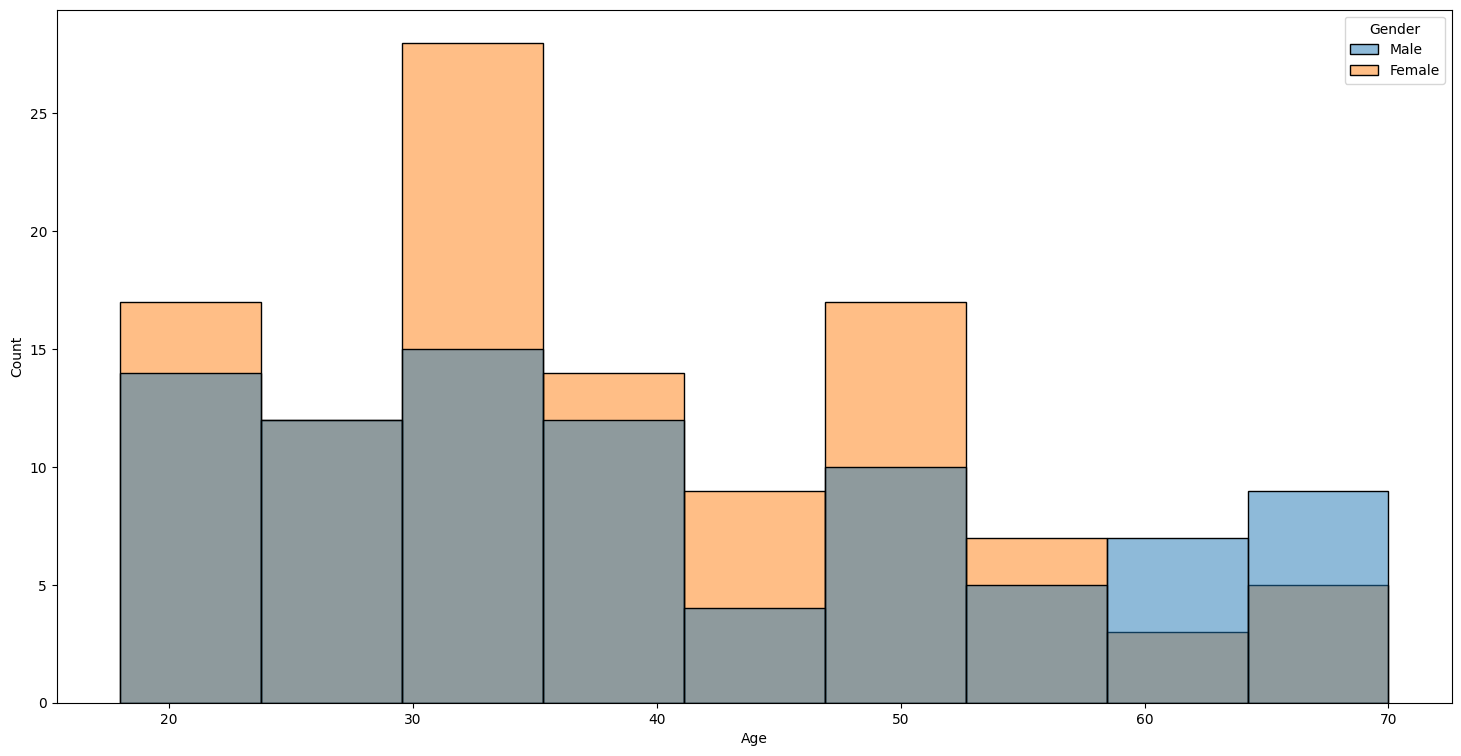

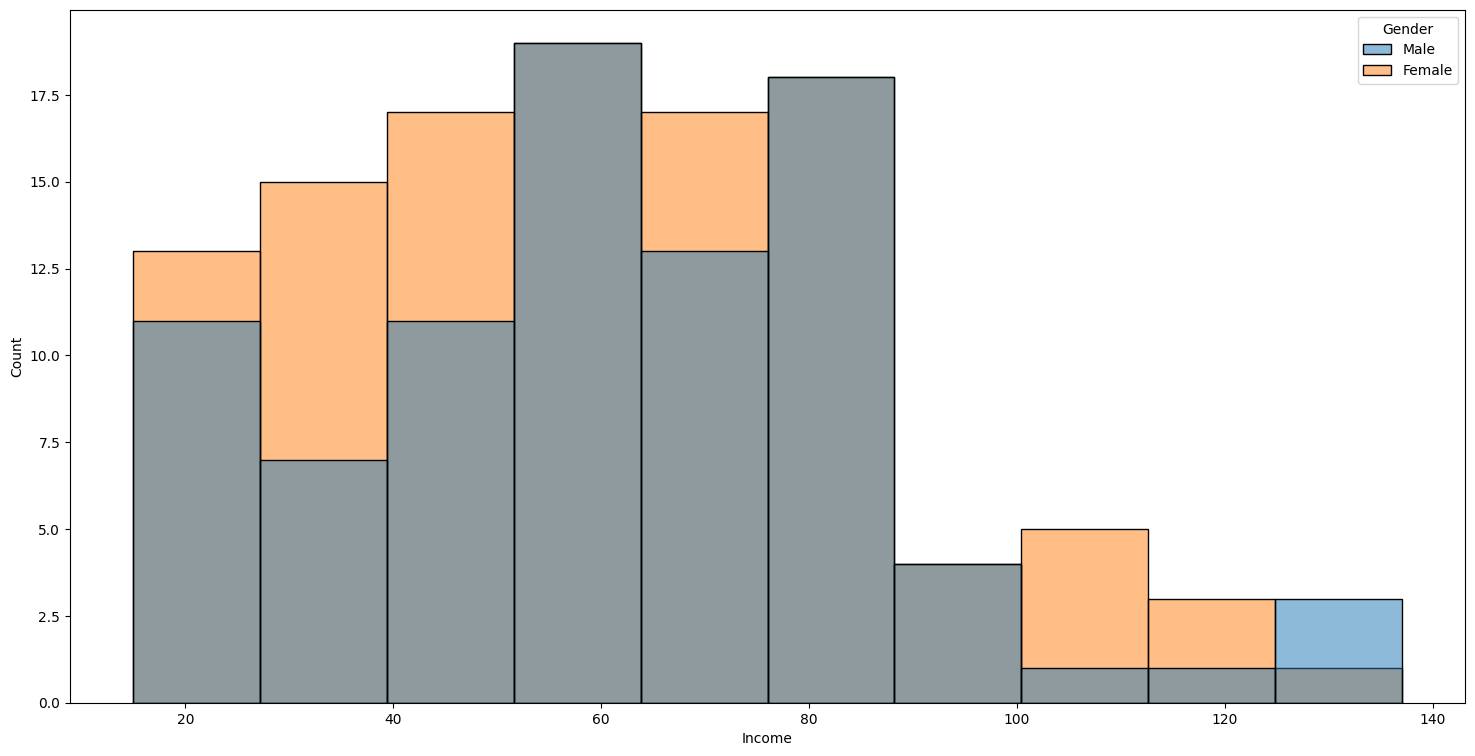

In [17]:
plt.figure(figsize = (18, 9))

sns.histplot(data = customer_set, x = 'Age' , hue = 'Gender')

plt.show()

plt.figure(figsize = (18, 9))
sns.histplot(data = customer_set, x = 'Income' , hue = 'Gender')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



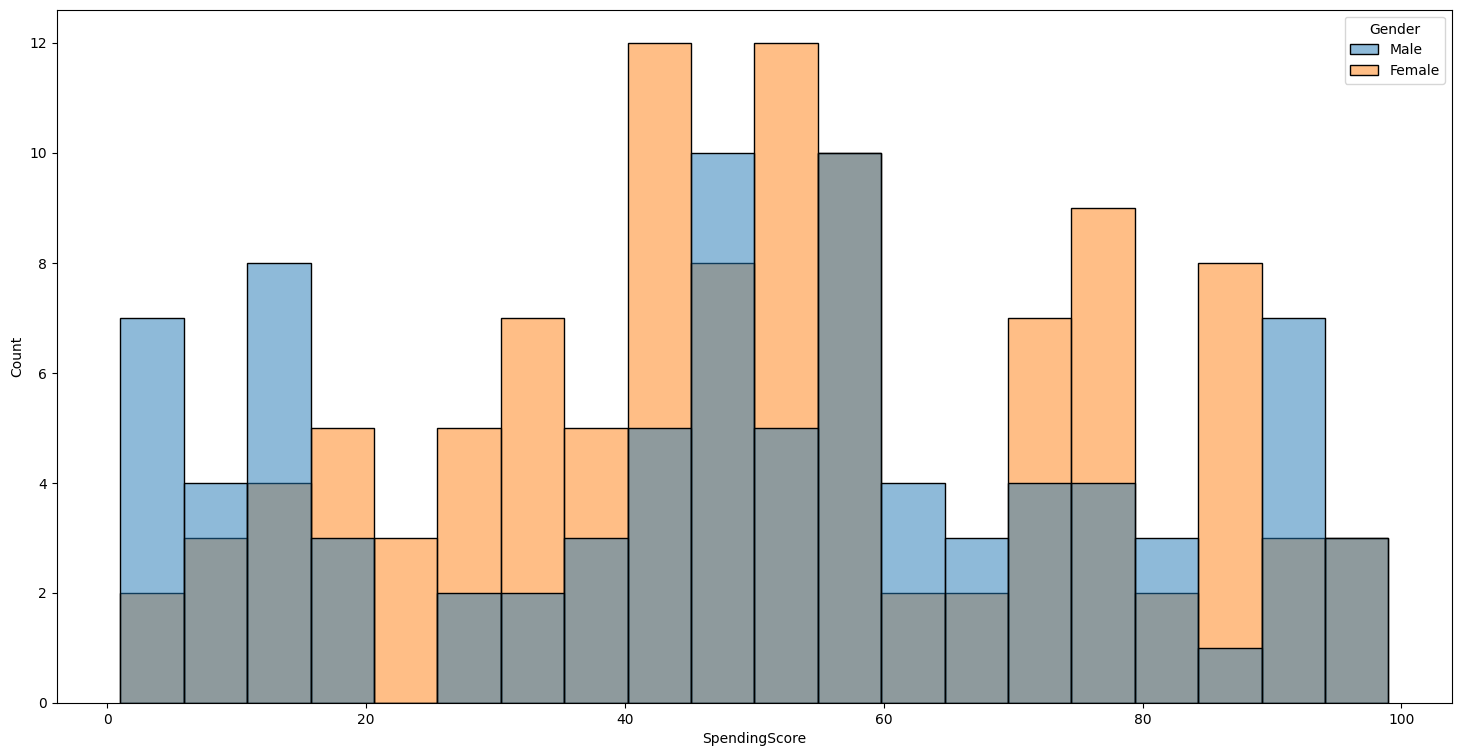

In [18]:
plt.figure(figsize = (18, 9))
sns.histplot(data=customer_set, x = 'SpendingScore', hue = 'Gender', multiple = 'layer', binwidth = 5)

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

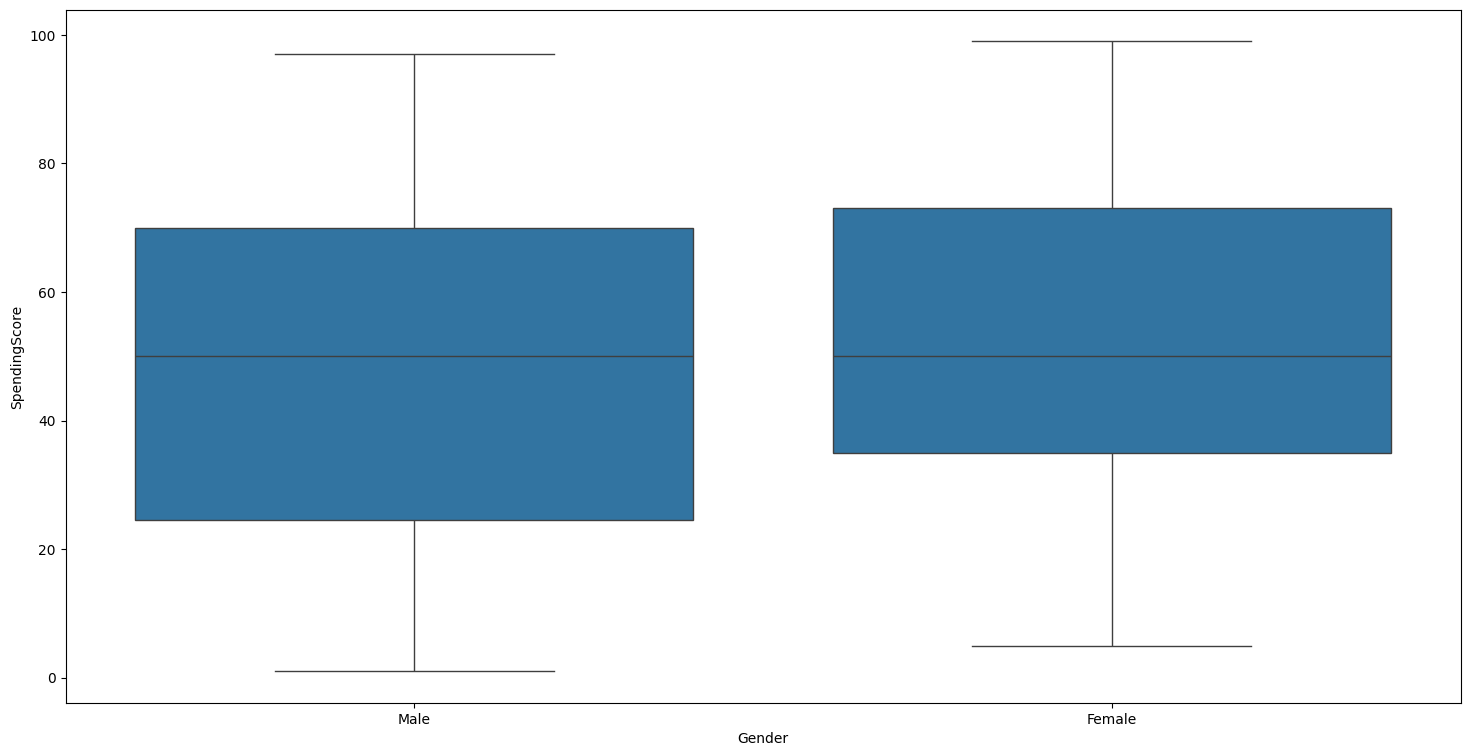

In [19]:
plt.figure(figsize = (18, 9))
sns.boxplot(data = customer_set, x = 'Gender', y = 'SpendingScore')

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?
У вибірці жінок більше, ніж чоловіків.
	
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 

Жінки мають вищий середній дохід порівняно з чоловіками.

3. Чи є різниця між витратами у чоловіків та жінок?
Жінки також витрачають більше коштів,За рівнем витрат жінки випереджають чоловіків.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

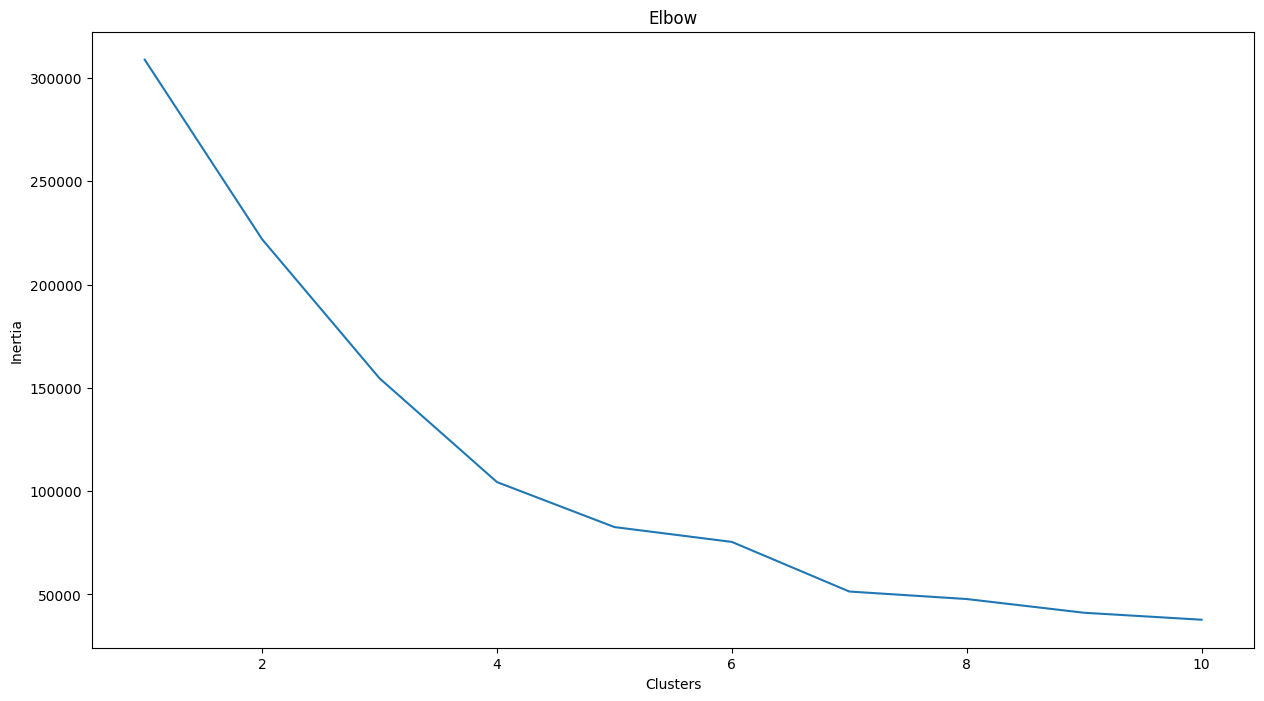

In [20]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i  in range(1, 11):
    
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

 Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
Чим більше кластерів, тим менша середня похибка.
Різкі перепади на графіку свідчать про суттєві відмінності між значеннями похибок.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

<Axes: xlabel='Income', ylabel='SpendingScore'>

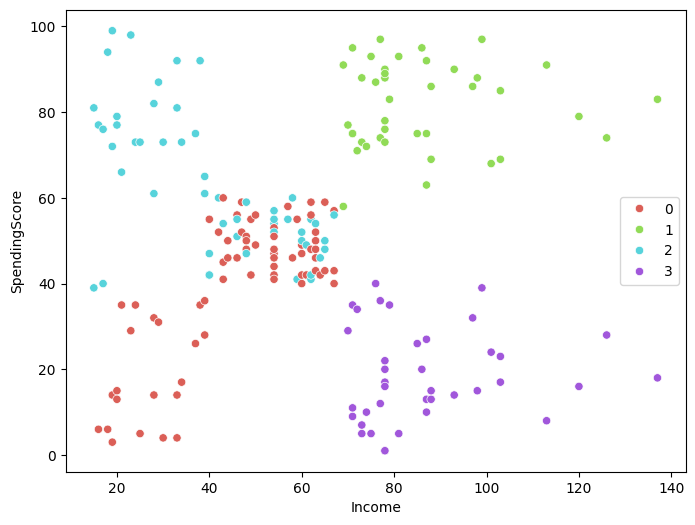

In [21]:
kmeans_4 = KMeans(n_clusters = 4).fit(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X['Income'], y = X['SpendingScore'], hue = kmeans_4.labels_, palette = sns.color_palette("hls", 4))

<Axes: xlabel='Income', ylabel='SpendingScore'>

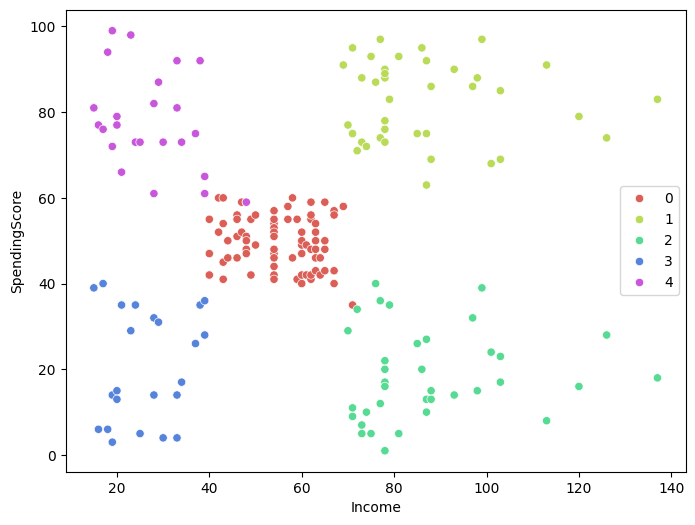

In [22]:
kmeans_5 = KMeans(n_clusters = 5).fit(X)
plt.figure(figsize = (8, 6))
sns.scatterplot(x = X['Income'], y = X['SpendingScore'], hue = kmeans_5.labels_, palette = sns.color_palette("hls", 5))

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [23]:
df_3d = customer_set.drop(['Gender'], axis=1)
fig = px.scatter_3d(df_3d, x='Age', y='SpendingScore', z='Income', color = km.labels_)
fig.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.

Оптимальна кількість кластерів становить 5.
Оскільки кількість даних фіксована, вибір іншої кількості кластерів може призвести до менш точних результатів.
Кластерний аналіз дозволяє визначити типи клієнтів банку на основі їхнього рівня доходів та витрат.


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


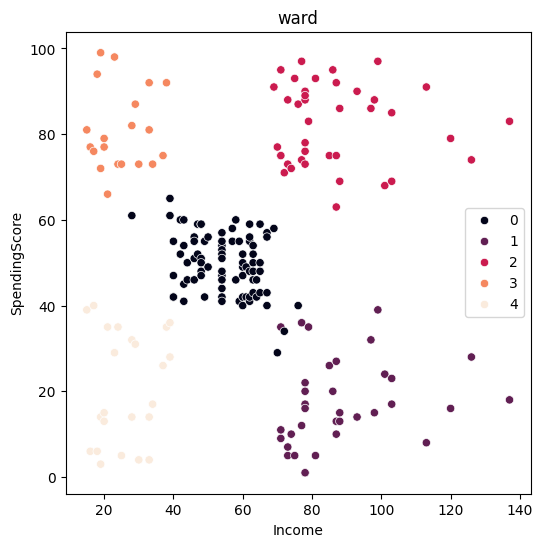

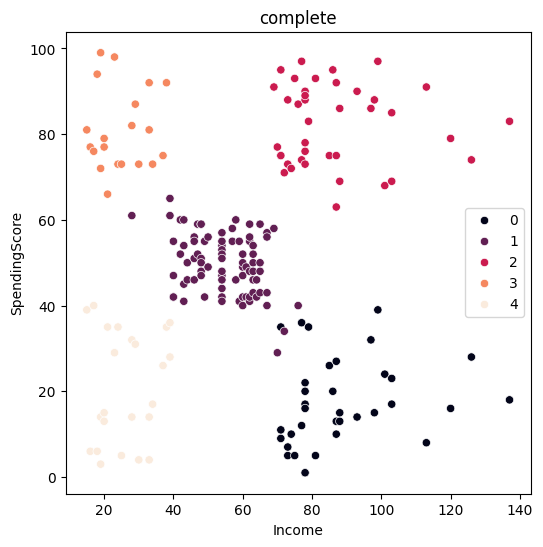

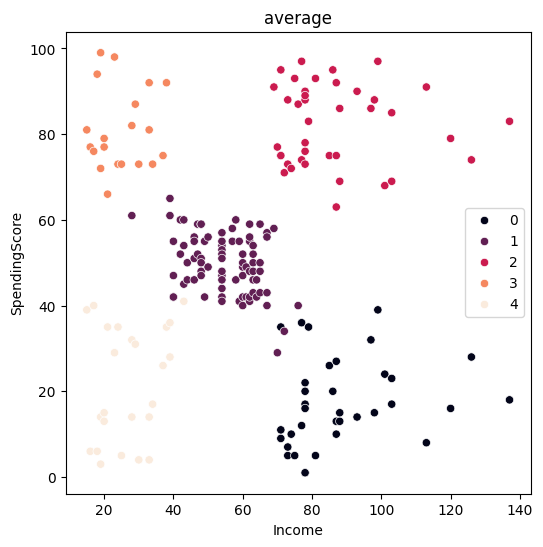

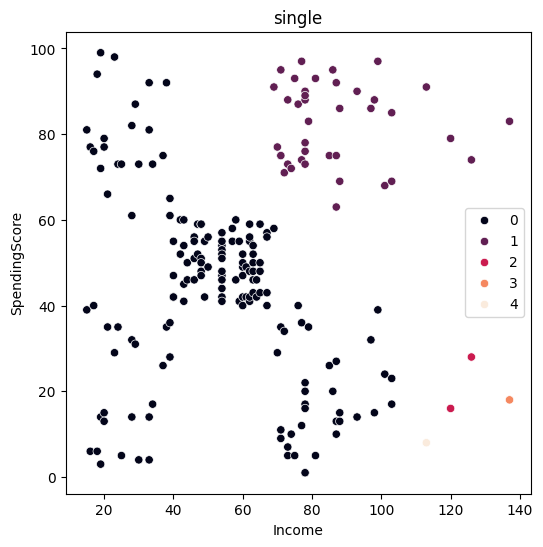

In [24]:
for j in ['ward','complete','average','single']:
    algo_cluster = AgglomerativeClustering(n_clusters = 5,linkage=j).fit(X)
    plt.figure(figsize =(6, 6))
    sns.scatterplot(x = 'Income', data=X,y='SpendingScore', 
               hue = algo_cluster.fit_predict(X),  palette ='rocket').set_title(j)
    plt.show()

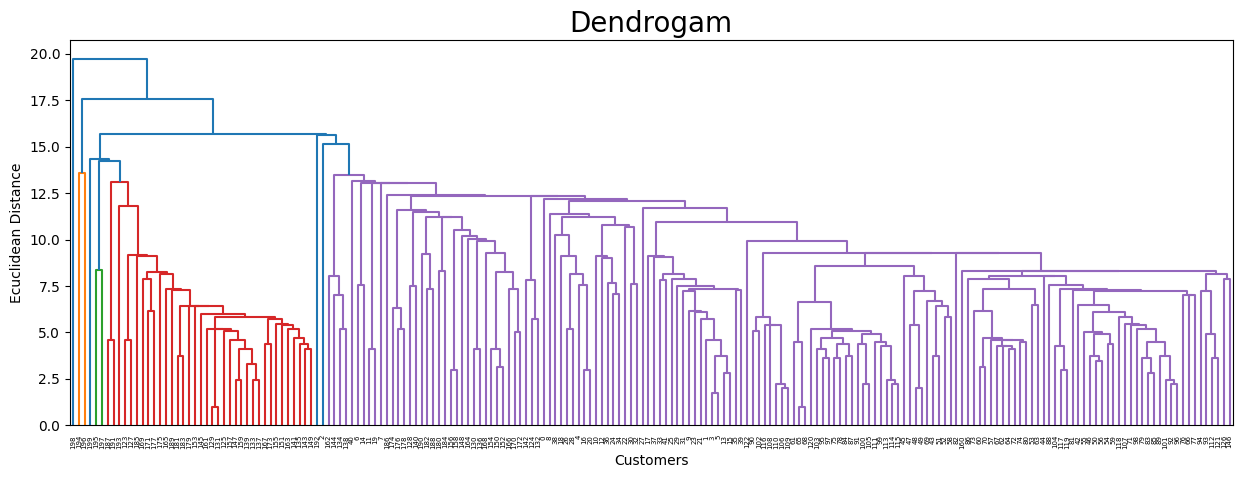

In [25]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

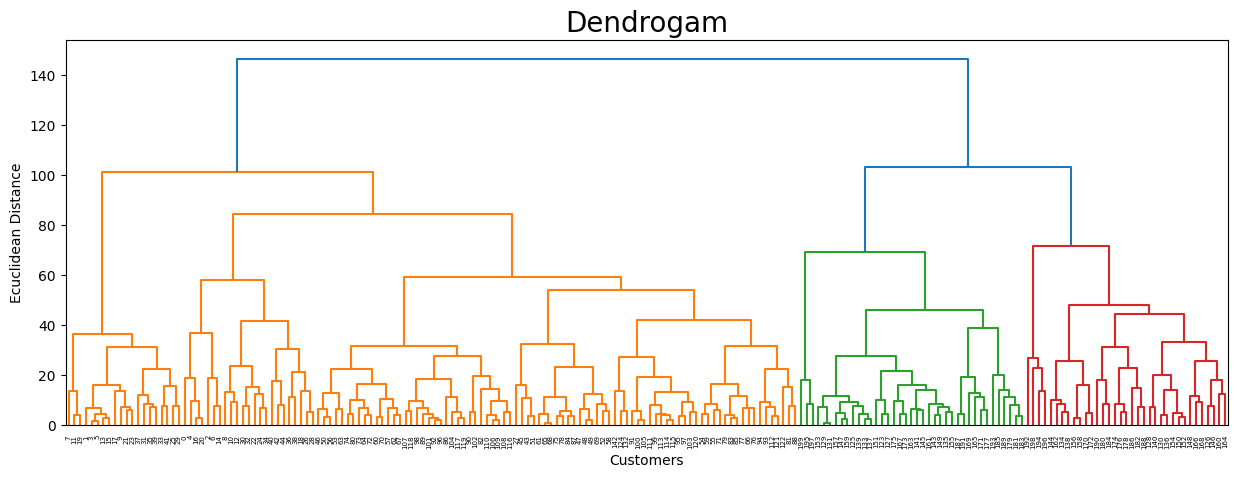

In [26]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

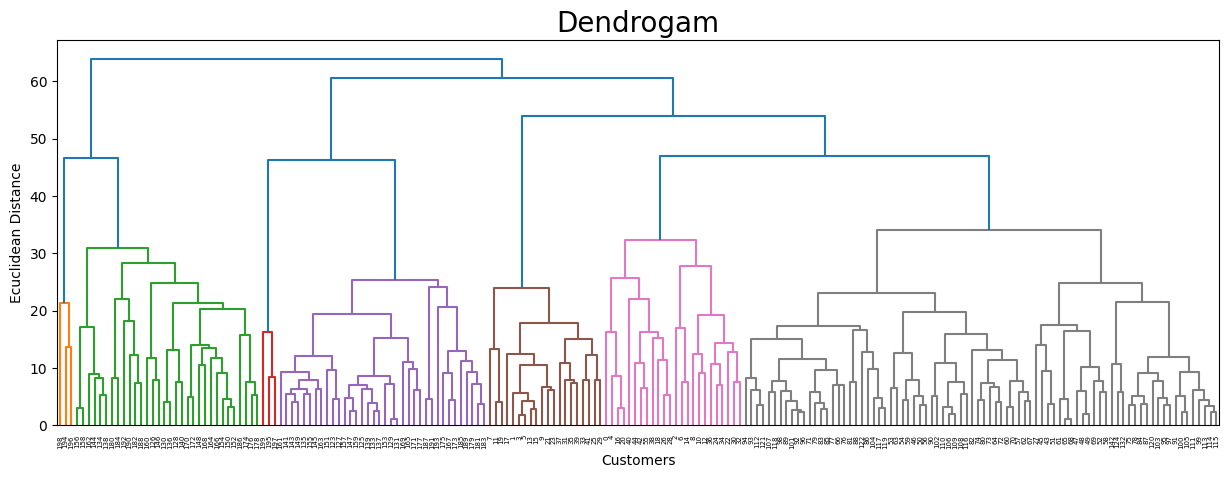

In [27]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

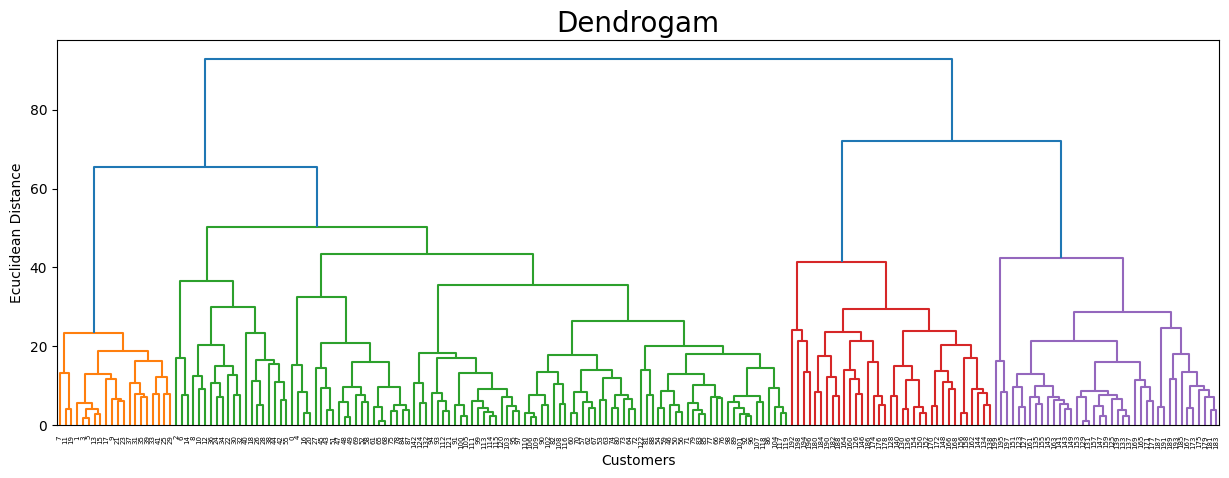

In [28]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'weighted'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

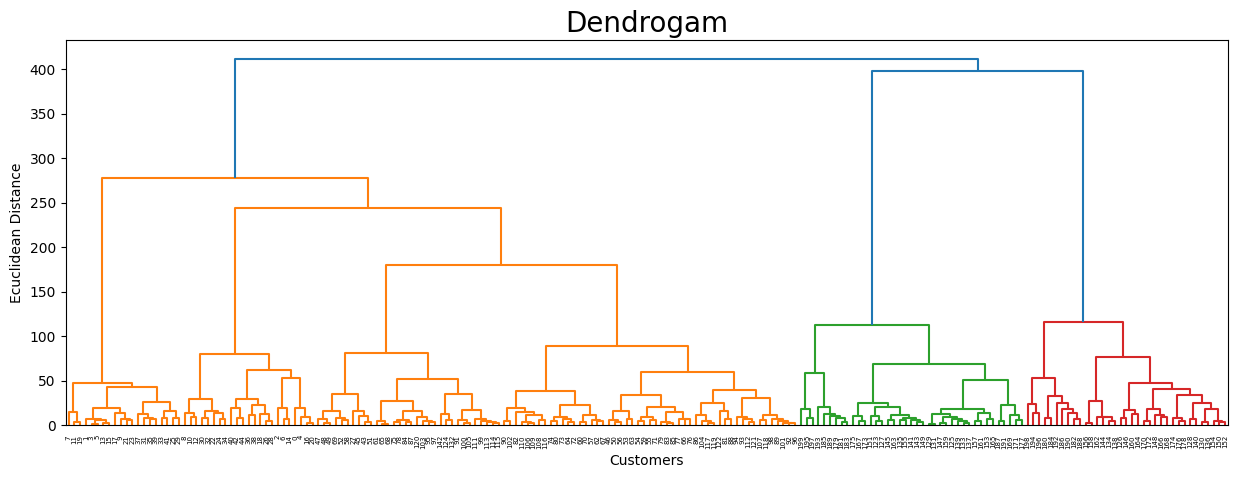

In [29]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Висновки з завдання 12 (детальні)**

Виконано ієрархічне кластеризування методами ward, complete, average і single.
Для кожного методу побудовано графіки розподілу клієнтів та дендрограми, що відображають процес об’єднання об’єктів у кластери.
Це допомогло візуально оцінити структуру даних і вибрати оптимальну кількість кластерів.


**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

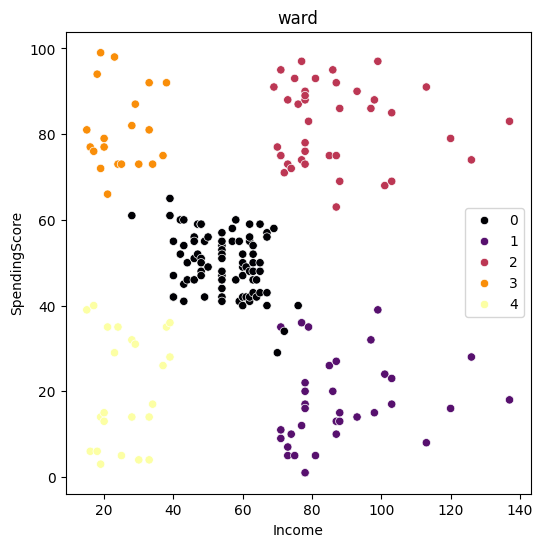

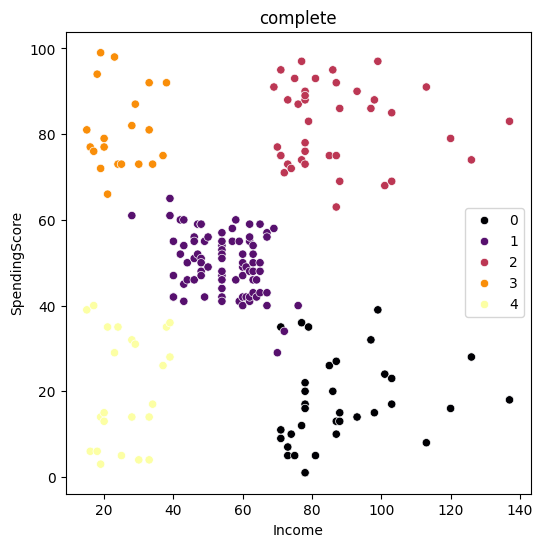

In [30]:
for j in ['ward','complete']:
    algo_cluster = AgglomerativeClustering(n_clusters = 5,linkage=j).fit(X)
    plt.figure(figsize =(6, 6))
    sns.scatterplot(x = 'Income', data=X,y='SpendingScore', 
               hue = algo_cluster.fit_predict(X),  palette ='inferno').set_title(j)
    plt.show()

**Висновки з завдання 13 (детальні)**

У цьому коді виконано агломеративне кластеризування даних методами ward і complete з фіксованою кількістю кластерів (5).
Побудовано графіки розподілу клієнтів за доходом і витратами з новою палітрою кольорів (inferno).
Змінились лише розподіли кластерів через різні методи об’єднання, хоча сама вибірка залишилась незмінною.
